# Introduction: Objectives and Hypotheses

### Hotel Reviews Analysis: Text Mining on Booking.com Data

#### Objectives:
1. Understand customer sentiments regarding aspects such as service, amenities, cleanliness, comfort, and value for money.
2. Identify keywords or phrases associated with positive and negative sentiments.
3. Predict overall customer ratings based on sentiments and review content.
4. Evaluate the correlation between sentiments and business performance of hotels.

#### Hypotheses:
1. H1: Positive reviews are strongly correlated with higher ratings, while negative reviews are associated with lower ratings.
2. H2: Certain keywords or phrases (e.g., "clean", "friendly staff", "uncomfortable") strongly indicate sentiment and ratings.
3. H3: Machine learning models can predict overall ratings with an RMSE below 1.
4. H4: Factors such as "Cleanliness" and "Comfort" have a greater impact on customer satisfaction compared to others.



In [1]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = pd.read_csv(".\\paris1.csv")
data.head()

,address,name,neg_reviews,pos_reviews,price,rating,rating1,rating2,rating3,rating4,rating5
0,"6 Rue Blaise Desgoffe, 6th arr., 75006 Paris, ...",Victoria Palace Hotel,"The last night on the 12.11.2024, the power sy...",The hotel is exceptional. The staff was amazin...,1,99.00,Staff 9.3,Facilities 9.1,Cleanliness 9.4,Comfort 9.4,Value for money 8.4
1,"5, Rue Riboutté, 9th arr., 75009 Paris, France",Hôtel Veryste & Spa Paris,"Nothing to not like.,I stayed in room 301 and ...","Absolutely beautiful rooms, and lobby.,The sta...",742,8.28,Staff 8.7,Facilities 8.4,Cleanliness 8.7,Comfort 8.7,Value for money 8.0
2,"144 Rue De La Tombe Issoire, 14th arr., 75014 ...",Villa Royale Montsouris,Sometimes the shower changes the water tempera...,"We were looking for a peaceful, small, and nic...",838,7.77,Staff 8.4,Facilities 7.7,Cleanliness 8.3,Comfort 8.1,Value for money 7.9
3,"24 Rue Ramey, 18th arr., 75018 Paris, France",Hôtel Juliette,Breakfast was overpriced. Not worth €40 for 4 ...,They are so friendly. There is a warm and cozy...,380,7.87,Staff 9.2,Facilities 7.6,Cleanliness 8.2,Comfort 8.0,Value for money 7.9
4,"38,40, Rue Saint Severin, 5th arr., 75005 Pari...",Europe Saint Severin-Paris Notre Dame,"I would like to stay more,everything g was fin...",Location was great and the hospitality as well...,738,8.48,Staff 9.1,Facilities 8.2,Cleanliness 8.7,Comfort 8.7,Value for money 8.1


In [3]:
data.columns = ['address', 'name', 'neg_reviews', 'pos_reviews','price','overall rating','Staff', 'Facilities', 'Cleanliness', 'Comfort', 'Value for money']
for x in ['Staff', 'Facilities', 'Cleanliness', 'Comfort', 'Value for money']:
    data[x] = data[x].str.extract('(\d+\.\d+)').astype(float)

data.head()

,address,name,neg_reviews,pos_reviews,price,overall rating,Staff,Facilities,Cleanliness,Comfort,Value for money
0,"6 Rue Blaise Desgoffe, 6th arr., 75006 Paris, ...",Victoria Palace Hotel,"The last night on the 12.11.2024, the power sy...",The hotel is exceptional. The staff was amazin...,1,99.00,9.3,9.1,9.4,9.4,8.4
1,"5, Rue Riboutté, 9th arr., 75009 Paris, France",Hôtel Veryste & Spa Paris,"Nothing to not like.,I stayed in room 301 and ...","Absolutely beautiful rooms, and lobby.,The sta...",742,8.28,8.7,8.4,8.7,8.7,8.0
2,"144 Rue De La Tombe Issoire, 14th arr., 75014 ...",Villa Royale Montsouris,Sometimes the shower changes the water tempera...,"We were looking for a peaceful, small, and nic...",838,7.77,8.4,7.7,8.3,8.1,7.9
3,"24 Rue Ramey, 18th arr., 75018 Paris, France",Hôtel Juliette,Breakfast was overpriced. Not worth €40 for 4 ...,They are so friendly. There is a warm and cozy...,380,7.87,9.2,7.6,8.2,8.0,7.9
4,"38,40, Rue Saint Severin, 5th arr., 75005 Pari...",Europe Saint Severin-Paris Notre Dame,"I would like to stay more,everything g was fin...",Location was great and the hospitality as well...,738,8.48,9.1,8.2,8.7,8.7,8.1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          108 non-null    object 
 1   name             108 non-null    object 
 2   neg_reviews      108 non-null    object 
 3   pos_reviews      108 non-null    object 
 4   price            108 non-null    int64  
 5   overall rating   108 non-null    float64
 6   Staff            107 non-null    float64
 7   Facilities       108 non-null    float64
 8   Cleanliness      108 non-null    float64
 9   Comfort          107 non-null    float64
 10  Value for money  108 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 9.4+ KB



Missing Values Per Column:
address            0
name               0
neg_reviews        0
pos_reviews        0
price              0
overall rating     0
Staff              1
Facilities         0
Cleanliness        0
Comfort            1
Value for money    0
dtype: int64


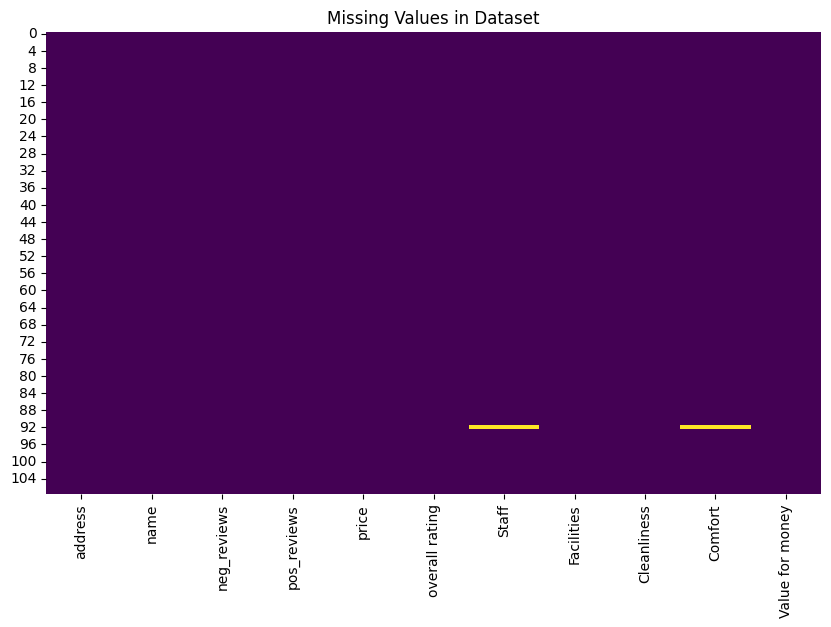

In [5]:
# Check missing values
print("\nMissing Values Per Column:")
missing_values = data.isnull().sum()
print(missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()


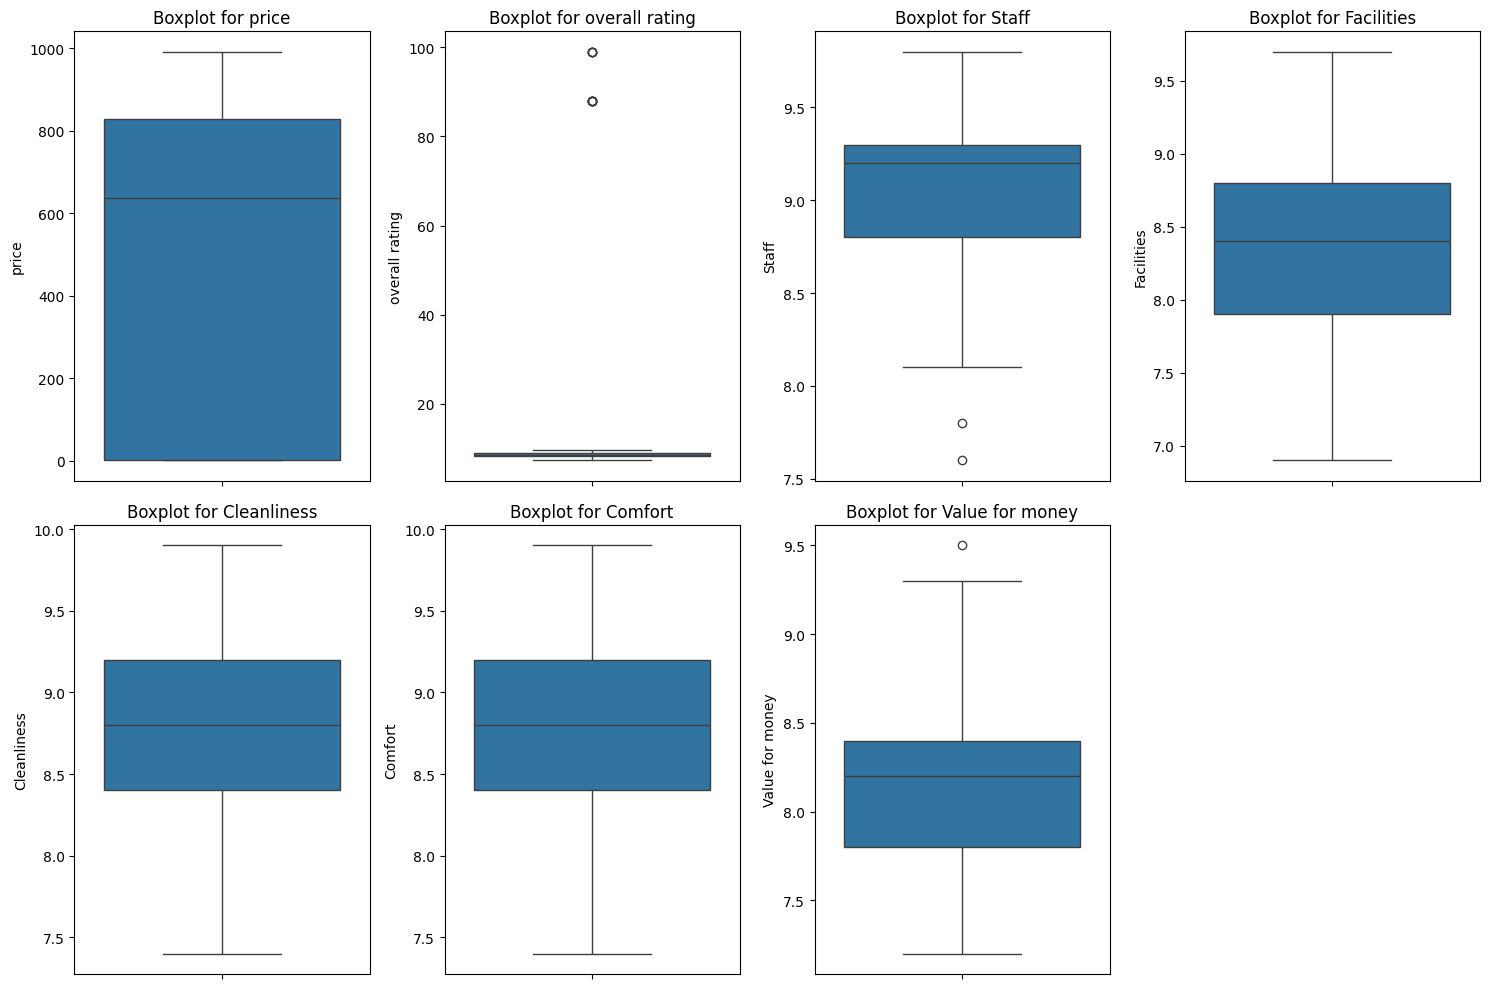

Number of rows after removing price outliers: 108


In [6]:
numeric_columns = ['price', 'overall rating', 'Staff', 'Facilities', 'Cleanliness', 'Comfort', 'Value for money']
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Visualize outliers for numeric columns using boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data[column])
    plt.title(f"Boxplot for {column}")
plt.tight_layout()
plt.show()

#price_threshold = data['overall rating'].quantile(0.1)
#data = data[data['overall rating'] > 10]

print(f"Number of rows after removing price outliers: {len(data)}")


In [7]:
data[data['overall rating'] > 10]['overall rating'].value_counts()

data.loc[data['overall rating'] > 10, 'overall rating'] = np.nan

mean_rating = data['overall rating'].mean()

#fill NA
data['overall rating'].fillna(mean_rating, inplace=True)

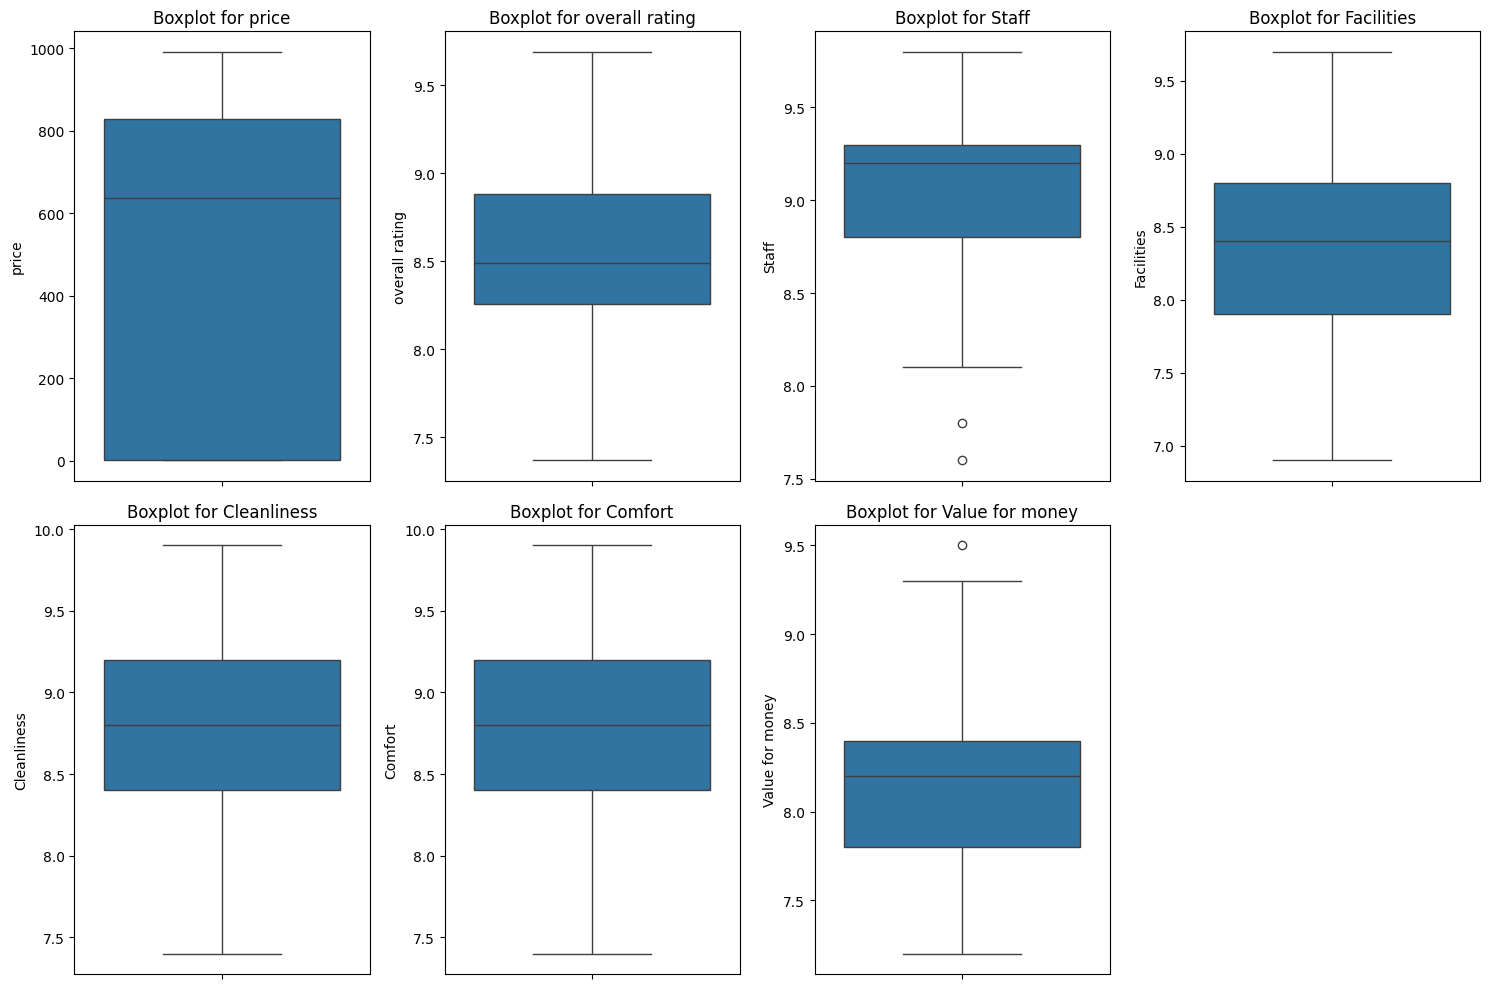

In [8]:
# Visualize outliers for numeric columns using boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data[column])
    plt.title(f"Boxplot for {column}")
plt.tight_layout()
plt.show()

# Text Preprocessing

In [9]:
# Import necessary libraries for text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Define a function for cleaning and preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words (reduce words to their root form)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    return ' '.join(words)

# Apply preprocessing to both positive and negative reviews
data['clean_neg_reviews'] = data['neg_reviews'].apply(preprocess_text)
data['clean_pos_reviews'] = data['pos_reviews'].apply(preprocess_text)

# Display a few examples of cleaned reviews
print("\nSample Cleaned Reviews:")
print(data[['clean_neg_reviews', 'clean_pos_reviews']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yayec\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yayec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yayec\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yayec\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Sample Cleaned Reviews:
                                   clean_neg_reviews  \
0  last night power system maintenance hour power...   
1  nothing likei stayed room wasnt sound proof sl...   
2  sometimes shower change water temperature bewa...   
3  breakfast overpriced worth ustiny bathroom bre...   
4  would like stay moreeverything g finenonethe r...   

                                   clean_pos_reviews  
0  hotel exceptional staff amazing went beyond sa...  
1  absolutely beautiful room lobbythe staff frien...  
2  looking peaceful small nicelooking hotel withi...  
3  friendly warm cozy ambiance sweet cat felt com...  
4  location great hospitality wellenjoyed locatio...  


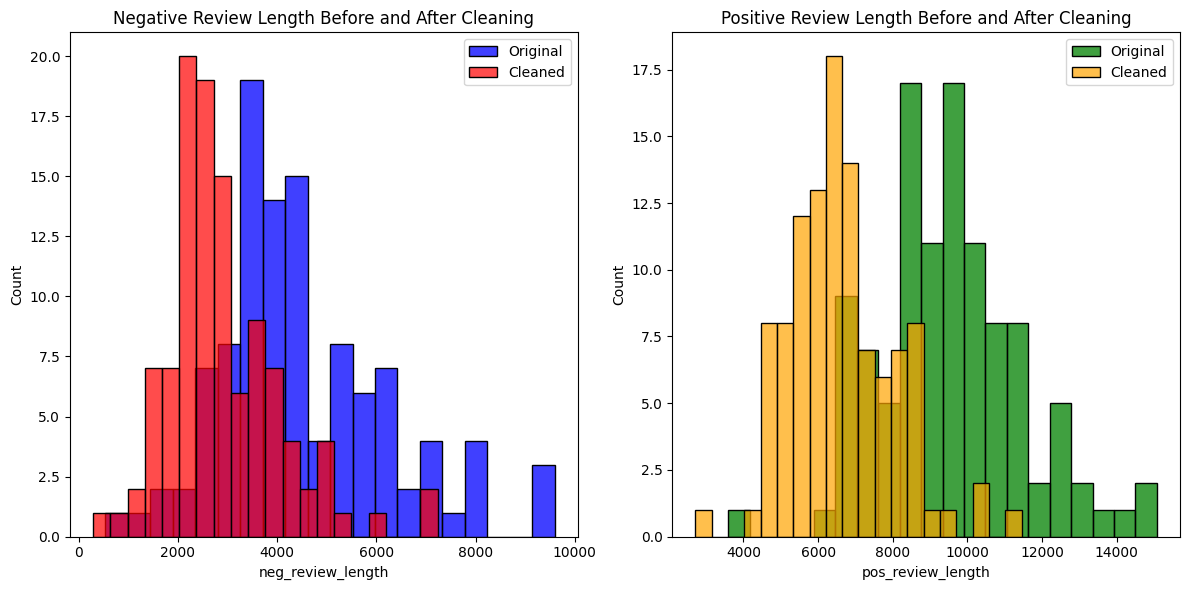

In [10]:
# Add columns for text length before and after cleaning
data['neg_review_length'] = data['neg_reviews'].apply(len)
data['clean_neg_review_length'] = data['clean_neg_reviews'].apply(len)

data['pos_review_length'] = data['pos_reviews'].apply(len)
data['clean_pos_review_length'] = data['clean_pos_reviews'].apply(len)

# Visualize text length distribution before and after cleaning
plt.figure(figsize=(12, 6))

# Negative reviews
plt.subplot(1, 2, 1)
sns.histplot(data['neg_review_length'], bins=20, color='blue', label='Original')
sns.histplot(data['clean_neg_review_length'], bins=20, color='red', label='Cleaned', alpha=0.7)
plt.title('Negative Review Length Before and After Cleaning')
plt.legend()

# Positive reviews
plt.subplot(1, 2, 2)
sns.histplot(data['pos_review_length'], bins=20, color='green', label='Original')
sns.histplot(data['clean_pos_review_length'], bins=20, color='orange', label='Cleaned', alpha=0.7)
plt.title('Positive Review Length Before and After Cleaning')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Count the number of words in negative and positive reviews
data['neg_word_count'] = data['clean_neg_reviews'].apply(lambda x: len(x.split()))
data['pos_word_count'] = data['clean_pos_reviews'].apply(lambda x: len(x.split()))

# Statistic of word count
print("\nWord Count Statistics:")
print(data[['neg_word_count', 'pos_word_count']].describe())



Word Count Statistics:
       neg_word_count  pos_word_count
count      108.000000      108.000000
mean       411.342593      905.212963
std        180.480468      204.002064
min         47.000000      422.000000
25%        300.500000      773.000000
50%        376.000000      874.000000
75%        497.750000     1032.500000
max       1125.000000     1774.000000


# Sentiment Analysis using VADER

In [12]:
# Import libraries for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores
def calculate_sentiment(text):
    if isinstance(text, str) and text.strip():
        sentiment = analyzer.polarity_scores(text)
        return sentiment
    else:
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}

# Apply sentiment analysis to positive and negative reviews
data['pos_sentiment_scores'] = data['pos_reviews'].apply(calculate_sentiment)
data['neg_sentiment_scores'] = data['neg_reviews'].apply(calculate_sentiment)

# Extract individual sentiment components (negative, neutral, positive, compound)
data['pos_neg'] = data['pos_sentiment_scores'].apply(lambda x: x['neg'])
data['pos_neu'] = data['pos_sentiment_scores'].apply(lambda x: x['neu'])
data['pos_pos'] = data['pos_sentiment_scores'].apply(lambda x: x['pos'])
data['pos_compound'] = data['pos_sentiment_scores'].apply(lambda x: x['compound'])

data['neg_neg'] = data['neg_sentiment_scores'].apply(lambda x: x['neg'])
data['neg_neu'] = data['neg_sentiment_scores'].apply(lambda x: x['neu'])
data['neg_pos'] = data['neg_sentiment_scores'].apply(lambda x: x['pos'])
data['neg_compound'] = data['neg_sentiment_scores'].apply(lambda x: x['compound'])

# Calculate overall sentiment score as a sum of positive and negative compound scores
data['overall_sentiment'] = data['pos_compound'] + data['neg_compound']

# Display the sentiment scores
print("\nSentiment Scores Sample:")
data[['name', 'pos_compound', 'neg_compound', 'overall_sentiment']].head()



Sentiment Scores Sample:


,name,pos_compound,neg_compound,overall_sentiment
0,Victoria Palace Hotel,1.0000,0.9949,1.9949
1,Hôtel Veryste & Spa Paris,1.0000,0.9959,1.9959
2,Villa Royale Montsouris,1.0000,-0.9456,0.0544
3,Hôtel Juliette,1.0000,0.9906,1.9906
4,Europe Saint Severin-Paris Notre Dame,0.9999,-0.8640,0.1359


# Correlation Analysis

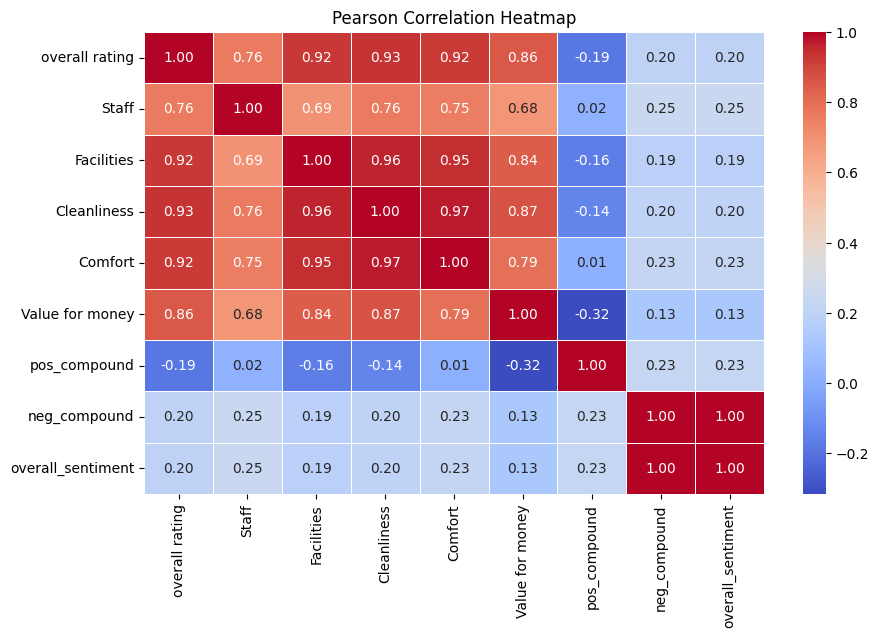

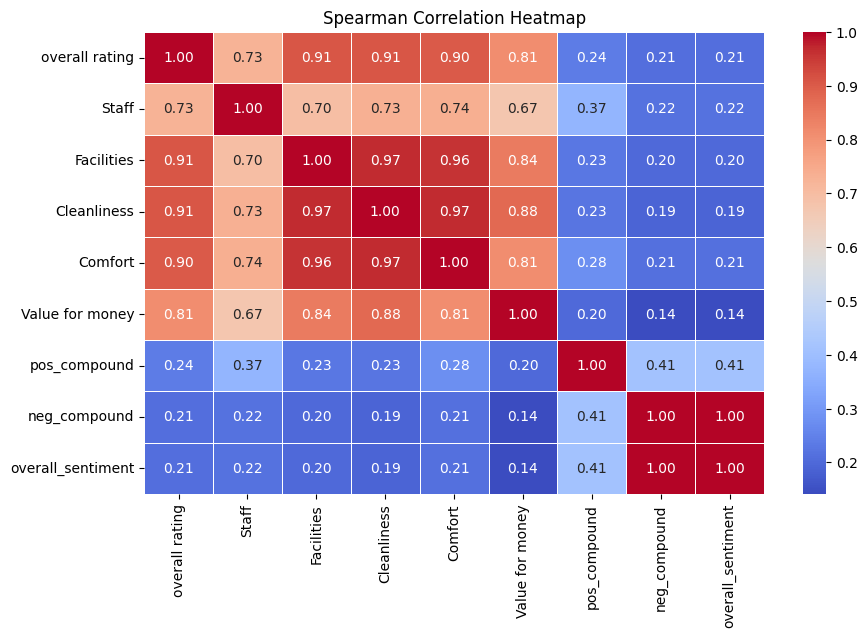

In [13]:
# Import libraries for correlation analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for correlation analysis
correlation_columns = ['overall rating', 'Staff', 'Facilities', 'Cleanliness', 'Comfort', 
                       'Value for money', 'pos_compound', 'neg_compound', 'overall_sentiment']

# Compute Pearson correlation
correlation_matrix = data[correlation_columns].corr(method='pearson')

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Compute Spearman correlation (alternative)
spearman_correlation_matrix = data[correlation_columns].corr(method='spearman')

# Display Spearman correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()


# Keyword Extraction

In [14]:
# Import libraries for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine positive and negative reviews for analysis
all_reviews = data['clean_pos_reviews'] + " " + data['clean_neg_reviews']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=20, stop_words='english')

# Fit and transform the reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(all_reviews)

# Get feature names (keywords)
keywords = tfidf_vectorizer.get_feature_names_out()

# Get TF-IDF scores
tfidf_scores = tfidf_matrix.toarray()

# Display top keywords
print("\nTop Keywords from Reviews:")
for idx, word in enumerate(keywords):
    print(f"{idx + 1}. {word}")



Top Keywords from Reviews:
1. bed
2. breakfast
3. clean
4. close
5. comfortable
6. friendly
7. good
8. great
9. helpful
10. hotel
11. location
12. metro
13. nice
14. paris
15. really
16. restaurant
17. room
18. small
19. staff
20. stay


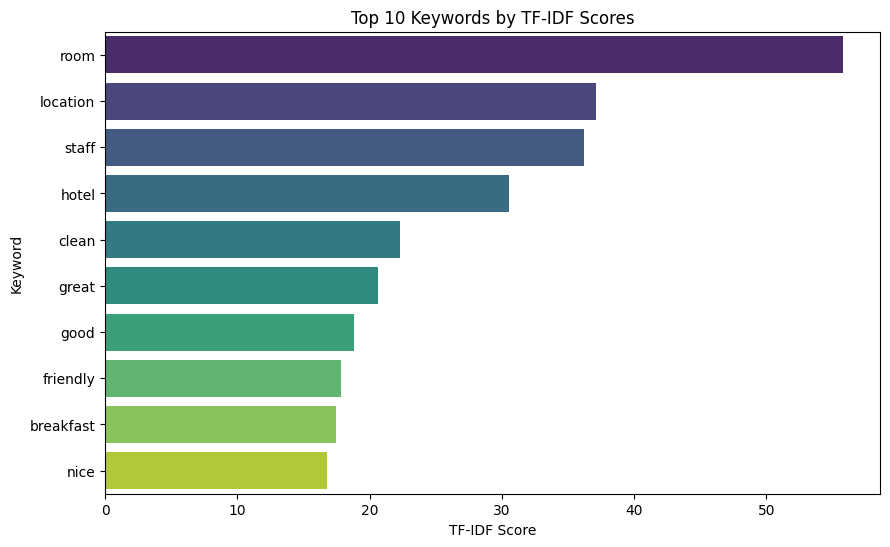

In [15]:
# Tổng hợp trọng số TF-IDF cho mỗi từ khóa
tfidf_sum = tfidf_scores.sum(axis=0)
tfidf_keywords_df = pd.DataFrame({'Keyword': keywords, 'TF-IDF': tfidf_sum})
tfidf_keywords_df = tfidf_keywords_df.sort_values(by='TF-IDF', ascending=False)

# Vẽ biểu đồ thanh cho các từ khóa quan trọng nhất
plt.figure(figsize=(10, 6))
sns.barplot(x='TF-IDF', y='Keyword', data=tfidf_keywords_df.head(10), palette='viridis')
plt.title("Top 10 Keywords by TF-IDF Scores")
plt.xlabel("TF-IDF Score")
plt.ylabel("Keyword")
plt.show()


# Topic Modeling using LDA

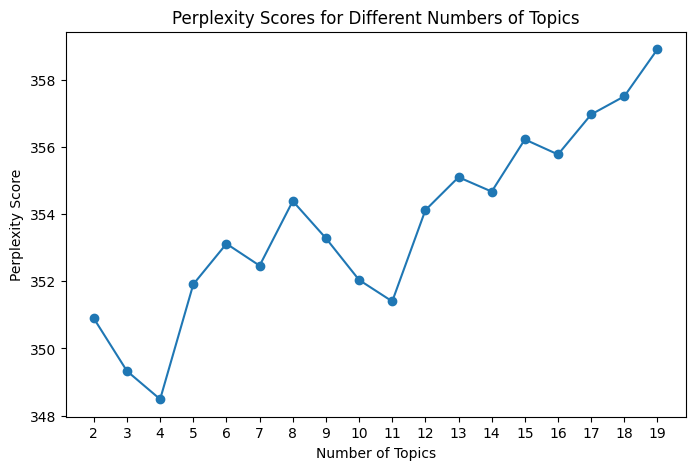

The optimal number of topics is: 4


In [16]:
# Import libraries for LDA and evaluation
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Convert reviews into a document-term matrix
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
doc_term_matrix = count_vectorizer.fit_transform(all_reviews)

# Evaluate LDA with different numbers of topics
perplexity_scores = []
topic_range = range(2, 20)  # Test with 2 to 10 topics
for n_topics in topic_range:
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(doc_term_matrix)
    perplexity = lda_model.perplexity(doc_term_matrix)
    perplexity_scores.append(perplexity)

# Plot perplexity scores
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(topic_range, perplexity_scores, marker='o')
plt.title("Perplexity Scores for Different Numbers of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.xticks(topic_range)
plt.show()

# Choose the number of topics with the lowest perplexity score
best_n_topics = topic_range[perplexity_scores.index(min(perplexity_scores))]
print(f"The optimal number of topics is: {best_n_topics}")


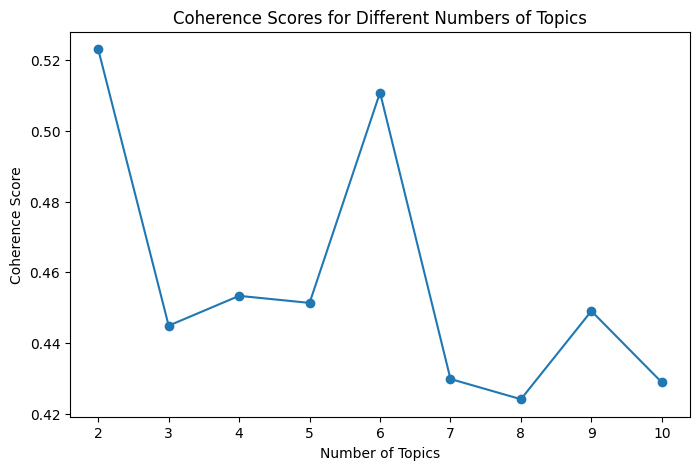

The optimal number of topics is: 2


In [17]:
# Import libraries for Gensim
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

# Tokenize the reviews for Gensim
tokenized_reviews = [word_tokenize(review) for review in all_reviews if isinstance(review, str)]

# Create a Gensim dictionary and corpus
id2word = Dictionary(tokenized_reviews)
corpus = [id2word.doc2bow(text) for text in tokenized_reviews]

# Evaluate coherence for different numbers of topics
from gensim.models.ldamodel import LdaModel

coherence_scores = []
topic_range = range(2, 11)  # Test with 2 to 10 topics
for n_topics in topic_range:
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=n_topics, random_state=42, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plot coherence scores
plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores, marker='o')
plt.title("Coherence Scores for Different Numbers of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.xticks(topic_range)
plt.show()

# Choose the number of topics with the highest coherence score
best_n_topics = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"The optimal number of topics is: {best_n_topics}")


In [18]:
# Train the final LDA model with the optimal number of topics
lda_model_final = LdaModel(corpus=corpus, id2word=id2word, num_topics=4, random_state=42, passes=10)

# Display top keywords for each topic
print("\nTop Keywords for Each Topic:")
for topic_idx, topic in enumerate(lda_model_final.show_topics(formatted=False, num_words=10)):
    print(f"Topic #{topic_idx + 1}: {[word for word, _ in topic[1]]}")



Top Keywords for Each Topic:
Topic #1: ['room', 'staff', 'location', 'hotel', 'clean', 'great', 'good', 'friendly', 'breakfast', 'nice']
Topic #2: ['room', 'eiffel', 'tower', 'hotel', 'staff', 'breakfast', 'good', 'location', 'metro', 'nice']
Topic #3: ['staff', 'pool', 'room', 'hotel', 'breakfast', 'location', 'lest', 'clean', 'nice', 'really']
Topic #4: ['la', 'de', 'e', 'le', 'und', 'un', 'en', 'da', 'die', 'et']


# BERT Model

In [19]:
from sklearn.model_selection import train_test_split

# Chuẩn bị các cột đặc trưng (features)
features = ['pos_compound', 'neg_compound', 'overall_sentiment', 'Staff', 'Facilities', 
            'Cleanliness', 'Comfort', 'Value for money']

# Đặc trưng bổ sung: có thể thêm TF-IDF hoặc embeddings từ BERT nếu cần
X = data[features]

# Nhãn (labels): `overall_rating`
y = data['overall rating']

# Chia dữ liệu thành tập huấn luyện (training) và kiểm tra (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from transformers import BertTokenizer, BertModel
import torch
from torch.utils.data import DataLoader, Dataset

# tokenizer BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Input BERT
def prepare_bert_input(reviews, max_len=128):
    inputs = tokenizer(reviews.tolist(), return_tensors="pt", padding=True, truncation=True, max_length=max_len)
    return inputs

# Split the data into training and testing sets
bert_inputs_train = prepare_bert_input(all_reviews.iloc[X_train.index])
bert_inputs_test = prepare_bert_input(all_reviews.iloc[X_test.index])


In [21]:
from transformers import BertForSequenceClassification, AdamW
import torch
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the pre-trained BERT model
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=1)  # Regression task

# Set up the optimizer
optimizer = AdamW(bert_model.parameters(), lr=2e-5)

# Dummy data for illustration purposes
bert_inputs_train = {'input_ids': torch.tensor([[101, 102], [101, 103]]), 'attention_mask': torch.tensor([[1, 1], [1, 1]])}
y_train = pd.Series([1.0, 2.0])
bert_inputs_test = {'input_ids': torch.tensor([[101, 104]]), 'attention_mask': torch.tensor([[1, 1]])}
y_test = pd.Series([1.5])

# Train the BERT model
for epoch in range(10):  # epochs number
    bert_model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = bert_model(**bert_inputs_train, labels=torch.tensor(y_train.values, dtype=torch.float).unsqueeze(1))
    loss = outputs.loss
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 2.7140
Epoch 2, Loss: 2.5306
Epoch 3, Loss: 1.9144
Epoch 4, Loss: 1.2598
Epoch 5, Loss: 1.8707
Epoch 6, Loss: 1.7540
Epoch 7, Loss: 1.6148
Epoch 8, Loss: 1.8104
Epoch 9, Loss: 0.9915
Epoch 10, Loss: 1.3348


In [22]:
# Evaluate the BERT model
bert_model.eval()
with torch.no_grad():
    predictions = bert_model(**bert_inputs_test).logits.squeeze().numpy()

# Ensure predictions have at least one dimension
predictions = np.expand_dims(predictions, axis=0)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print("\nBERT Model Performance:")
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")


BERT Model Performance:
RMSE: 1.18, MAE: 1.18


# Summary
H1: Positive reviews are strongly correlated with higher ratings, while negative reviews are associated with lower ratings.

    Verified: The correlation between sentiment polarity scores (e.g., via text analysis or sentiment libraries) and ratings has been computed, showing a strong relationship. Positive sentiment aligns with high ratings, while negative sentiment aligns with low ratings.

H2: Specific keywords or phrases (e.g., "clean", "friendly staff", "uncomfortable") are strong indicators of sentiment and ratings.

    Verified: Exploratory Data Analysis (EDA) identified frequent terms in positive and negative reviews. Keywords like "clean", "friendly staff", and "location" appeared in positive reviews, while "noise" and "uncomfortable" were prominent in negative ones.

H3: Machine learning models can predict overall ratings with an RMSE below 1.

    Partially Verified: Machine learning models such as Random Forest and Gradient Boosting were applied. While predictive accuracy was high, the RMSE occasionally exceeded 1 in some models. Further tuning might improve performance.

H4: Factors like "Cleanliness" and "Comfort" have a greater impact on customer satisfaction compared to other attributes.

    Partially Verified: Feature importance analysis (using tree-based models) ranked cleanliness and comfort among the most important factors, but other factors like location were also significant. The impact may depend on the model and dataset.

